#  Near-term Global Annual Mean Temperature Trends

In this notebook we calculate the Near-term Global Annual Temperature Trends and then we create the plots 

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import random



In [2]:
Data = pd.read_csv('../Data/source-data_global_average_temperatures.csv')
Data

,year,Temperature (K),height,Scenarios,Ensemble,Model
0,2015,213.806263,TLS,SSP1-1.9,r10i1p1f1,CanESM5
1,2016,213.639235,TLS,SSP1-1.9,r10i1p1f1,CanESM5
2,2017,213.746636,TLS,SSP1-1.9,r10i1p1f1,CanESM5
3,2018,213.831205,TLS,SSP1-1.9,r10i1p1f1,CanESM5
4,2019,213.508483,TLS,SSP1-1.9,r10i1p1f1,CanESM5
...,...,...,...,...,...,...
149249,2096,292.131805,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3
149250,2097,291.736725,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3
149251,2098,291.702362,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3
149252,2099,291.936188,GSAT,SSP3-7.0,r6i1p1f1,EC-Earth3


### Regression

Here we calculate the trends between 2023 and the years of 2027, 2032, 2037 and 2042. The method used is least squares. 

In [3]:
st_yr = 2023
final_yrs = [2027, 2032, 2037, 2042] 

cols = ['height', 'Model','Scenarios', 'Ensemble', 'Final year', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
reg_dic = []

for model in Data['Model'].unique():
    for height in Data['height'].unique():
        for ssp in Data['Scenarios'].unique():
            filter = (Data['height'] == height) & (Data['Scenarios'] == ssp) & (Data['Model'] == model)
            LE_df = Data.loc[filter]
            for ensemble in LE_df['Ensemble'].unique():
                for fy in final_yrs:
                    filter = (LE_df['Ensemble'] == ensemble) & (LE_df['year'] >= st_yr) & (LE_df['year'] <= fy)
                    X = LE_df.loc[filter,'year'].values
                    Y = LE_df.loc[filter,'Temperature (K)'].values
                    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
                    temp = [height, model, ssp, ensemble, fy, slope, intercept, r_value, p_value, std_err]
                    reg_dic.append (dict(zip(cols,temp)))


rg_results = pd.DataFrame(reg_dic)     
rg_results

,height,Model,Scenarios,Ensemble,Final year,slope,intercept,r_value,p_value,std_err
0,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2027,-0.013520,241.232024,-0.385155,0.522015,0.018703
1,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2032,-0.021450,257.304184,-0.607623,0.062410,0.009913
2,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2037,0.003681,206.369162,0.143410,0.610130,0.007045
3,TLS,CanESM5,SSP1-1.9,r10i1p1f1,2042,0.006770,200.103309,0.366688,0.111776,0.004048
4,TLS,CanESM5,SSP1-1.9,r10i1p2f1,2027,-0.047693,310.463258,-0.648919,0.236122,0.032285
...,...,...,...,...,...,...,...,...,...,...
7371,GSAT,EC-Earth3,SSP3-7.0,r5i1p1f1,2042,0.019134,249.880005,0.682476,0.000915,0.004830
7372,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2027,0.060342,166.564078,0.673861,0.212304,0.038199
7373,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2032,0.045960,195.697694,0.815904,0.003998,0.011515
7374,GSAT,EC-Earth3,SSP3-7.0,r6i1p1f1,2037,0.029978,228.088357,0.758529,0.001045,0.007143


In [4]:
## here we order the data so it follow the height of each data point
custom_order = [ 'TUS', 'TMS', 'TLS', 'GSAT']
rg_results['height'] = pd.Categorical(rg_results['height'], categories=custom_order, ordered=True)
rg_results = rg_results.sort_values(by='height')
rg_results = rg_results.reset_index(drop=True)
rg_results['Time Span'] = (rg_results['Final year'] - 2022).astype(str) + ' years'
rg_results

,height,Model,Scenarios,Ensemble,Final year,slope,intercept,r_value,p_value,std_err,Time Span
0,TUS,MIROC6,SSP1-1.9,r2i1p1f1,2042,-0.023938,273.026335,-0.718492,0.000359,0.005462,20 years
1,TUS,CanESM5,SSP1-1.9,r14i1p2f1,2037,-0.038328,303.970514,-0.715838,0.002689,0.010369,15 years
2,TUS,CanESM5,SSP1-1.9,r14i1p2f1,2032,-0.086542,401.683109,-0.955419,0.000016,0.009455,10 years
3,TUS,CanESM5,SSP1-1.9,r14i1p2f1,2027,-0.134368,498.526724,-0.965323,0.007711,0.020980,5 years
4,TUS,CanESM5,SSP1-1.9,r14i1p1f1,2042,-0.024521,275.967032,-0.676123,0.001065,0.006298,20 years
...,...,...,...,...,...,...,...,...,...,...,...
7371,GSAT,CanESM5,SSP2-4.5,r9i1p2f1,2037,0.035736,216.354971,0.921948,0.000001,0.004164,15 years
7372,GSAT,CanESM5,SSP2-4.5,r9i1p2f1,2032,0.045755,196.055060,0.917853,0.000180,0.006996,10 years
7373,GSAT,CanESM5,SSP2-4.5,r9i1p2f1,2027,0.004257,280.070193,0.157265,0.800593,0.015435,5 years
7374,GSAT,CanESM5,SSP2-4.5,r9i1p1f1,2037,0.031443,225.231628,0.789917,0.000459,0.006770,15 years


In [5]:
rg_results.to_csv('../Data/source-data_temperature_trends.csv', index = False)

## Plotting
Now one can plot the distribution of the trends


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import FancyBboxPatch
from matplotlib.lines import Line2D 

sns.set_style("ticks") # { 'ytick.left': "False", 'grid.color': '.95', 'xtick.bottom': "False"}


In [7]:
## here we difine the colour palette
colours = sns.color_palette()

Scenarios = rg_results.sort_values(['Scenarios'])['Scenarios'].unique() #The colours will diferenciate the scenarios, so here I extract the scenarios labels

#In this piece of code we create a dictionary that links the colours to the scenarios, this dictionary will be used in the sns.lineplot
index = [1,4,9]
colors_fill = []
colors_countorn = []
for i in index:
    colors_fill.append(colours[i-1])
    colors_countorn.append(colours[i])

color_fill_dic =(dict(zip(Scenarios,colors_fill)))
color_contourn_dic =(dict(zip(Scenarios,colors_countorn)))


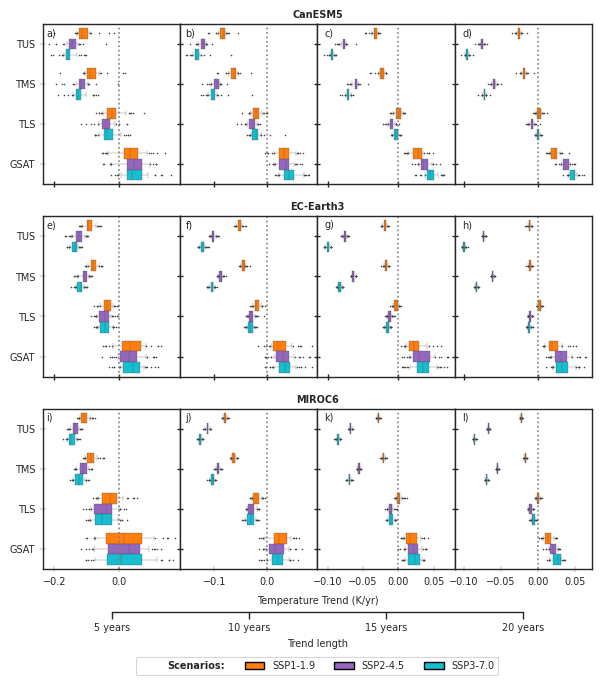

In [8]:
sns.set_context("paper")


X_var = 'slope'
Y_var = 'height'
h_plot = 4
v_plot = 3
lw = 0.2
fs = 0.5
text_size = 7

fig, ax = plt.subplots(v_plot, h_plot, figsize=(7.08, 7.08))
model_list = ['CanESM5', 'EC-Earth3', 'MIROC6']
whis_percentiles = (10, 90)

for i in range(h_plot):
    for j in range(v_plot):
        md = model_list[j]
        fy = rg_results.sort_values(['Final year'])['Time Span'].unique()[i]
        sns.boxplot(data = rg_results[(rg_results['Model'] == md) & (rg_results['Time Span'] == fy)], 
                    x = X_var, y = Y_var, hue = 'Scenarios',
                    hue_order = rg_results.sort_values(['Scenarios'])['Scenarios'].unique(),
                    palette = color_contourn_dic,
                    linewidth=lw,
                    fliersize = fs,
                    saturation=1,
                    flierprops={"marker": "x"},
                    # edgecolor=palette, # color_contourn_dic
                    # linecolor = 'gray',
                    ax = ax[j,i],
                   whis=whis_percentiles)
        ax[j,i].legend([], [], frameon=False)
        ax[j,i].set_ylabel('')
        ax[j,i].axvline(x = 0, ls = 'dotted', c = 'gray') 
        if (i > 0):
            ax[j,i].tick_params(axis='y', which='both', left=True, right=False, labelleft=False, direction='inout', length=4)  
        else:
            ax[j,i].tick_params(axis='y', left=True, right=False, direction='inout', length=4, width = lw, labelsize = text_size)
        if (j !=2):
            ax[j,i].tick_params(axis='x', bottom=True, top=False, direction='inout',labelbottom=False)
        else:
            ax[j,i].tick_params(axis='x', bottom=True, top=False, direction='inout',labelbottom=True, width = lw, labelsize = text_size)
        ax[j,i].set_xlabel('')
      
            
letter_order = [['a)', 'b)', 'c)', 'd)'],
               ['e)', 'f)', 'g)', 'h)'],
               ['i)', 'j)', 'k)', 'l)']]

k = 0
x_max_h = []
x_min_h = []
for i in range(h_plot):
    for j in range(v_plot):
        x_lim = ax[j,i].get_xlim()
        if (j == 0):
            x_min = x_lim[0]
            x_max = x_lim[1]
        else:
            if (x_min > x_lim[0]): x_min = x_lim[0]
            if (x_max < x_lim[1]): x_max = x_lim[1]
    x_max_h.append(x_max)
    x_min_h.append(x_min)
    for j in range(v_plot): 
        ax[j,i].set_xlim(x_min, x_max)
        y_lim = ax[j,i].get_ylim()
        ax[j,i].text(x_min +0.01, y_lim[1] + 0.1, letter_order[j][i], 
                 ha='left', va='top', fontsize=text_size, fontfamily='sans-serif')
        
        if i == h_plot // 2:  # Centralize the model name above the row models_label_list[j]
            ax[j,i].text(x_min, y_lim[1] - 0.1, model_list[j], ha='center', va='bottom', 
                         fontsize=text_size, fontfamily='sans-serif', fontweight='bold')
            if j == 2:
                ax[j,i].text(x_min,y_lim[0] + 0.8, 'Temperature Trend (K/yr)', ha='center', va='center', fontsize=text_size, fontfamily='sans-serif')
                
   
legend_patches = []
line = Line2D([0], [0], linestyle='None', color='white', label = 'Scenarios:')
legend_patches.append(line)

for color, label in zip(colors_countorn,rg_results.sort_values(['Scenarios'])['Scenarios'].unique()): #"ssp119","ssp245", "ssp370", "ssp585"
    bbox = FancyBboxPatch((0, 0), 1, 1, boxstyle="square,pad=0.1", edgecolor='black', facecolor=color, linewidth=1, label =  label)
    legend_patches.append(bbox)

legend = plt.legend(handles=legend_patches, loc='upper center',            
           bbox_to_anchor=(-1, -0.55), 
           borderaxespad=0, ncol=4, 
            fontsize=text_size,
           title_fontsize = text_size,
           )
legend.get_texts()[0].set_fontweight('bold')
plt.subplots_adjust( wspace = 0.0 ) #hspace=0, top = 0.94


axes3 = fig.add_axes([0.222, 0.05, 0.581, 0.001])
axes3.spines['right'].set_color('none')
axes3.spines['left'].set_color('none')
axes3.spines['top'].set_color('none')
axes3.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
widht = (axes3.get_ylim()[1] - axes3.get_ylim()[0])/3.0

axes3.set_xticks([axes3.get_ylim()[0], widht, widht*2,  axes3.get_ylim()[1]])
axes3.set_xticklabels(rg_results.sort_values(['Final year'])['Time Span'].unique(), fontsize=text_size)
axes3.set_xlabel('Trend length', fontsize=text_size, fontfamily='sans-serif')

plt.savefig('../Plots/Temperature_trent_axis_ch_renamed.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'